# **CVPS20 // Image Thresholding: Part 2**

*September 15, 2020*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Global Image Thresholding

Let's read in our astro image again, convert to float, and extract the individual color channels,

In [10]:
# -- load image and convert to float
fname = "https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/ngc6357_0.jpg"
img = np.asarray(iio.imread(fname)) / 255.0
print(img.shape)

# -- extract color channels
red, grn, blu = img.transpose(2,0,1)

(780, 985, 3)


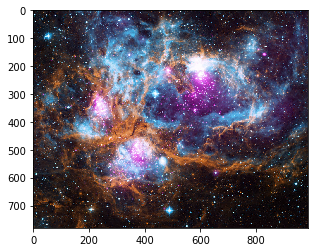

In [8]:
plt.imshow(img)

Notice that the channels are very morphologically distinct,

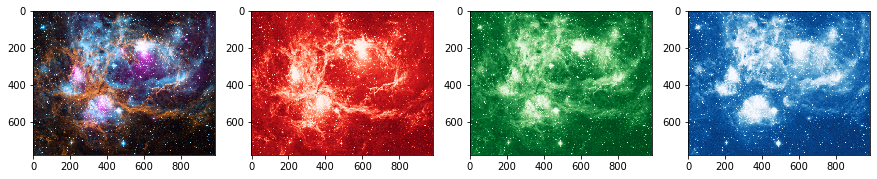

In [11]:
# -- imshow the three channels separately
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
ax[0].imshow(img)
ax[1].imshow(red, cmap="Reds_r")
ax[2].imshow(grn, cmap="Greens_r")
ax[3].imshow(blu, cmap="Blues_r")

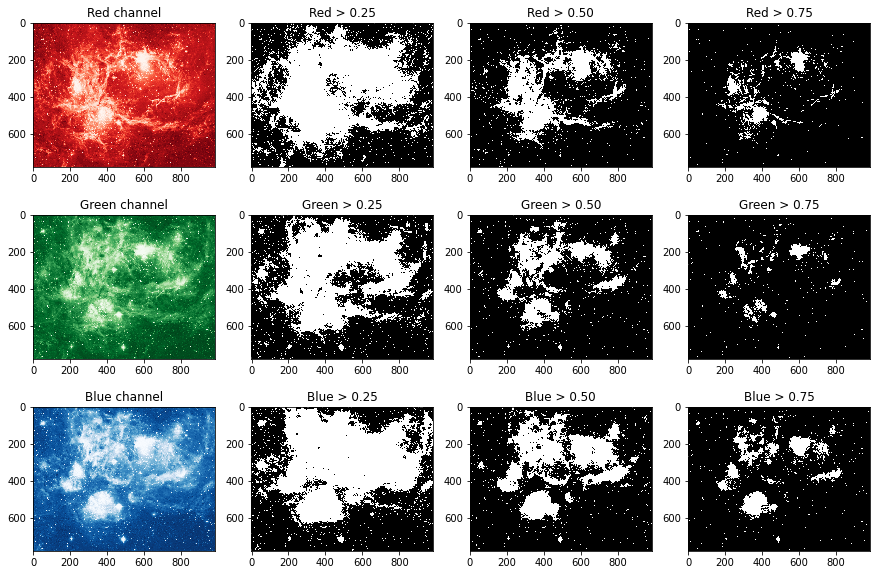

In [12]:
# -- initialize figure
fig, ax = plt.subplots(3, 4, figsize=(15, 10))

# -- create a multi-panel figure
cmaps = ["Reds_r", "Greens_r", "Blues_r"]
names = ["Red", "Green", "Blue"]

for ii in range(3):

  # -- show the channel and thresholds
  ax[ii, 0].imshow(img[:, :, ii], cmap=cmaps[ii])
  ax[ii, 1].imshow(img[:, :, ii] > 0.25)
  ax[ii, 2].imshow(img[:, :, ii] > 0.50)
  ax[ii, 3].imshow(img[:, :, ii] > 0.75)

  # -- label images
  ax[ii, 0].set_title(names[ii] + " channel")
  ax[ii, 1].set_title(names[ii] + " > 0.25")
  ax[ii, 2].set_title(names[ii] + " > 0.50")
  ax[ii, 3].set_title(names[ii] + " > 0.75")

fig.show()

---

### Setting Global Image Thresholds

*How do we choose a "good" threshold value to isolate the pixels we want?*

Let's consider another astronomy image that we saw in the first class,

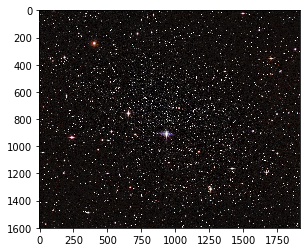

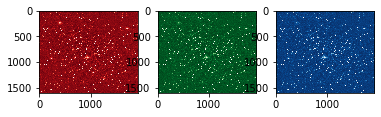

In [13]:
# -- read in the Carina Dwarf Galaxy image
fname = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Carina_Dwarf_Galaxy.jpg/1920px-Carina_Dwarf_Galaxy.jpg"
img = iio.imread(fname) / 255.

# -- extract 3 color channels
red, grn, blu = img.transpose(2, 0, 1)

# -- display the image
fig0, ax0 = plt.subplots()
ax0.imshow(img)
fig0.show()

# -- display the color channels
fig1, ax1 = plt.subplots(1, 3)

ax1[0].imshow(red, "Reds_r")
ax1[1].imshow(grn, "Greens_r")
ax1[2].imshow(blu, "Blues_r")

fig1.show()

Let's say we want to use the green channel to count the number of objects.  We start by thresholding, but what threshold to choose?  

For example:

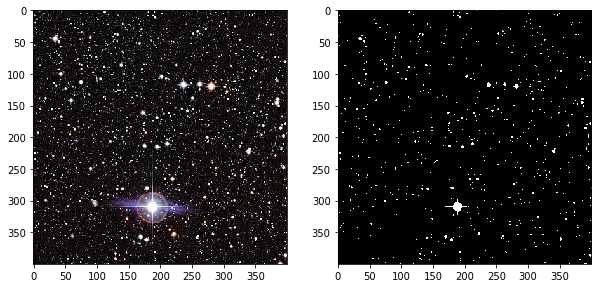

In [16]:
# -- zoom on the image and the thresholded green channel
fig, ax = plt.subplots(1, 2, figsize = (10, 10))

ax[0].imshow(img[600:1000, 750:1150])
ax[1].imshow(grn[600:1000, 750:1150] > .9)

The histogram of values in the image can give us some clues:

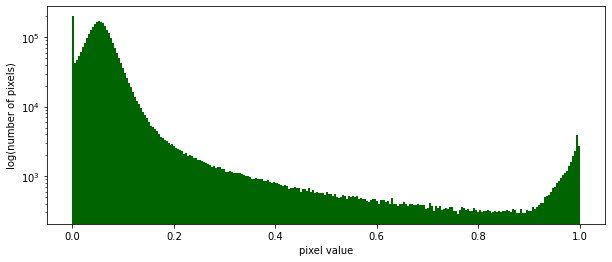

In [18]:
# -- make a histogram of the green channel values
fig, ax = plt.subplots(figsize=(10, 4))

hst = ax.hist(grn.flatten(), bins = 256, color = 'darkgreen') #hist needs 1D array

ax.set_yscale('log')

ax.set_xlabel('pixel value')
ax.set_ylabel('log(number of pixels)')

fig.show()

The `scikit-image` module has a couple of useful functions that we will use, one of which determines the Otsu threshold,

In [22]:
#makes a threshold, finds all the weighted variances to the left and to the right
#subtracts the 2 to get intra-variance
#subtracts this number from variance to get inter-variance
#peak of intervariance is threshold (where the code split and found the 2 variances to be best)
# -- find a threshold automatically using Otsu's method
from skimage.filters import threshold_otsu
othr = threshold_otsu(grn)
print("Otsu method threshold: {0}".format(othr))

Otsu method threshold: 0.384765625


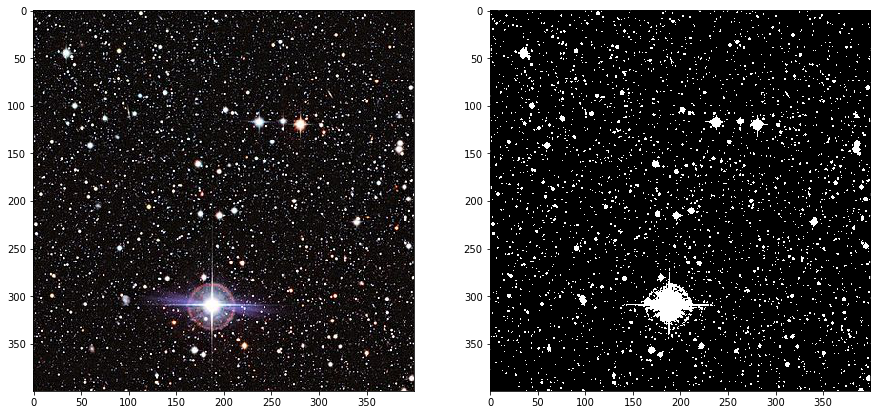

In [23]:
# -- show the image using Otsu's threshold
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img[600:1000, 750:1150])
ax[1].imshow(grn[600:1000, 750:1150] > othr)
